## Appendix

In [1]:
%config InlineBackend.figure_formats = ['svg']

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit as fit
from scipy.signal import find_peaks as peaks
import uncertainties.unumpy as unp
import uncertainties.umath as um
from uncertainties.unumpy import uarray as uar, nominal_values as noms, std_devs as stds
from uncertainties import ufloat as u

plt.rcParams['figure.figsize']=[8,5]
plt.rcParams['figure.constrained_layout.use']=True
plt.rcParams['legend.frameon']=False
plt.rcParams["xtick.minor.visible"]=True
plt.rcParams["ytick.minor.visible"]=True

lam = 1.5406e-10

### Detector-Scan

$$G(x; a, b, \mu, \sigma) \equiv a e^{-(x - \mu)^2 / 2\sigma^2} + b$$

[1.006417700358727+/-0.010164108667253082
 0.014197507905308729+/-0.0023675643325001337
 0.007441455599657689+/-0.000442657237954838
 0.038483857043642385+/-0.00046080102255544004]


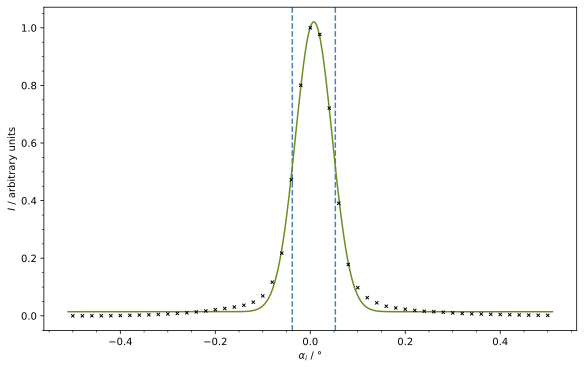

MAX: 1.021+/-0.010
FWHM: [0.05275273458789498+/-0.000700219839359264, -0.037869823388579596+/-0.000700219839359264]


In [2]:
ang, I = np.genfromtxt('data/Detectorscan.UXD', unpack=True, skip_header=56)
I = I / np.max(I)

def gauss(x, a, b, m, s):
    return a * np.e**(- (x - m)**2 / (2 * s**2)) + b

par, cov = fit(gauss, ang, I, p0=[1.0, 0.0, 0.0, 0.1])
err = np.sqrt(np.diag(cov))

upar = uar(par, err)

print(upar)

x = np.linspace(-0.51, 0.51, 1000)

fwhm = [upar[2] + np.sqrt(2 * np.log(2)) * upar[3], upar[2] - np.sqrt(2 * np.log(2)) * upar[3]]

plt.axvline(fwhm[0].n, linestyle='--', color='steelblue')
plt.axvline(fwhm[1].n, linestyle='--', color='steelblue')
plt.plot(x, gauss(x, *noms(upar)), color='olivedrab')
plt.plot(ang, I, 'kx', ms=3.21)

plt.xlabel(r'$\alpha_i$ / °')
plt.ylabel(r'$I$ / arbitrary units')

plt.show()
plt.close()

print(f'MAX: {gauss(upar[2], *upar)}')
print(f'FWHM: {fwhm}')

### Z-Scan

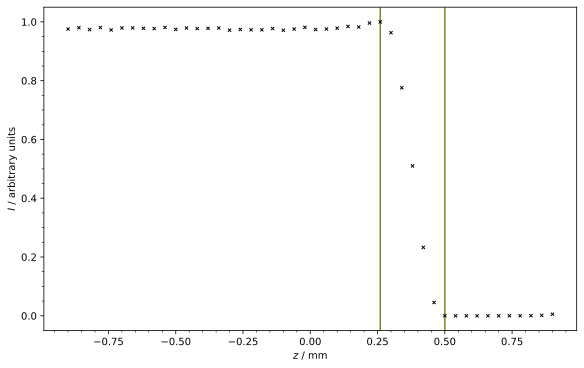

d = 0.24+/-0.06 mm


In [3]:
z, I = np.genfromtxt('data/Z-Scan-09to09v1.UXD', unpack=True, skip_header=56)
I = I / np.max(I)

z1 = u(z[-17], z[1] - z[0])
z2 = u(z[-11], z[1] - z[0])

plt.axvline(z1.n, color='olivedrab')
plt.axvline(z2.n, color='olivedrab')
plt.plot(z, I, 'kx', ms=3.21)

plt.xlabel(r'$z$ / mm')
plt.ylabel(r'$I$ / arbitrary units')

plt.show()
plt.close()

d = z2 - z1

print(f'd = {d} mm')

### X-Scan

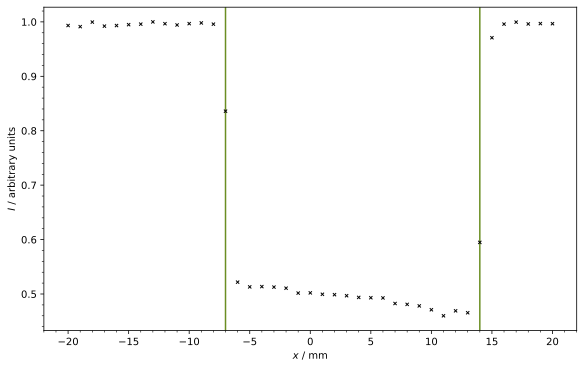

D = 21.0+/-2.8 mm (assuming square shape)


In [4]:
x, I = np.genfromtxt('data/X-Scan-20to20v1.UXD', unpack=True, skip_header=56)
I = I / np.max(I)

x1 = u(x[13], x[2] - x[0])
x2 = u(x[-7], x[2] - x[0])

plt.axvline(x1.n, color='olivedrab')
plt.axvline(x2.n, color='olivedrab')

plt.plot(x, I, 'kx', ms=3.21)

plt.xlabel(r'$x$ / mm')
plt.ylabel(r'$I$ / arbitrary units')

plt.show()
plt.close()

D = x2 - x1

print(f'D = {D} mm (assuming square shape)')

### Rocking-Curve

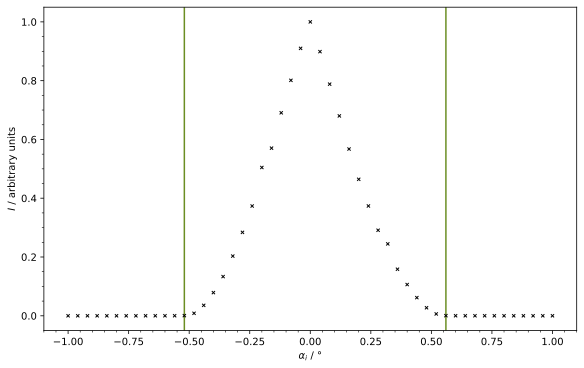

Geometry Angle
Exp.: 0.540+/-0.028 °
Theo.: 0.65+/-0.18 ° (exact) 0.65+/-0.18 ° (approximated)


In [5]:
ang, I = np.genfromtxt('data/Rocking-Scan-1to1v1.UXD', unpack=True, skip_header=56)
I = I / np.max(I)

ang1 = u(ang[12], ang[1] - ang[0])
ang2 = u(ang[-12], ang[1] - ang[0])

plt.axvline(ang1.n, color='olivedrab')
plt.axvline(ang2.n, color='olivedrab')

plt.plot(ang, I, 'kx', ms=3.21)

plt.xlabel(r'$\alpha_i$ / °')
plt.ylabel(r'$I$ / arbitrary units')

plt.show()
plt.close()

ang_exp = (ang2 - ang1) / 2
ang_theo_exact = um.asin(d / D) * 180 / np.pi
ang_theo_approx = d / D * 180 / np.pi

print('Geometry Angle')
print(f'Exp.: {ang_exp} °')
print(f'Theo.: {ang_theo_exact} ° (exact) {ang_theo_approx} ° (approximated)')

### Reflectivity & Diffusive Scans

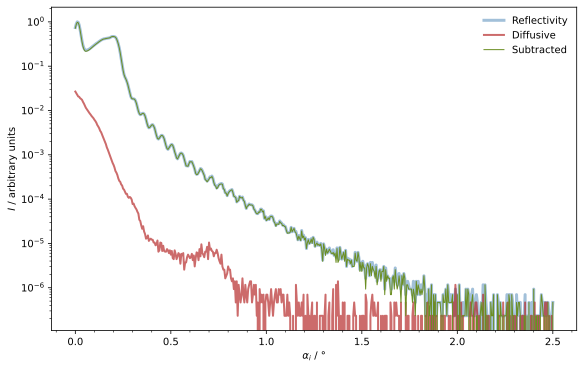

In [6]:
ang_ref, I_ref = np.genfromtxt('data/Reflektivität.UXD', unpack=True, skip_header=56)
ang_dif, I_dif = np.genfromtxt('data/Diffus.UXD', unpack=True, skip_header=56)

I_ref, I_dif = I_ref / np.max(I_ref), I_dif / np.max(I_ref)

ang_sub = (ang_ref + ang_dif) / 2
I_sub = I_ref - I_dif

plt.plot(ang_ref, I_ref, color='steelblue', linewidth=3, alpha=1/2, label='Reflectivity')
plt.plot(ang_dif, I_dif, color='firebrick', linewidth=2, alpha=2/3, label='Diffusive')
plt.plot(ang_sub, I_sub, color='olivedrab', linewidth=1, label='Subtracted')

plt.xlabel(r'$\alpha_i$ / °')
plt.ylabel(r'$I$ / arbitrary units')

plt.yscale('log')

plt.legend()

plt.show()
plt.close()

### Geometry Correction

$$\alpha_c \approx \sqrt{2\delta} = \sqrt{\frac{\lambda^2 \rho_e r_e}{\pi}}$$

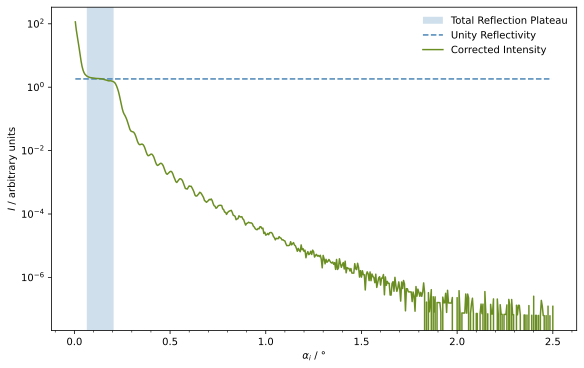

Total Reflection
I = 1.82+/-0.19
ang = 0.205+/-0.010 °
delta = (6.4+/-0.6)e-06

rho_e * r_e = (1.69+/-0.17)e+11 cm^-2


In [7]:
def geom(ang):
    ang = ang * np.pi / 180
    if ang <= ang_exp.n:
        return D.n * np.sin(ang) / d.n +1e-6
    return 1.0

ang_corr = ang_sub[1:]
I_corr = (I_sub / np.vectorize(geom)(ang_sub))[1:]

plateau = [ang_corr[12], ang_corr[40]]
plt.axvspan(*plateau, edgecolor=None, facecolor='steelblue', alpha=1/4, label='Total Reflection Plateau')

I_c = u(np.mean(I_corr[12:41]), np.std(I_corr[12:41]))
ang_c = u(ang_corr[40], ang_corr[2] - ang_corr[0]) * np.pi / 180

plt.plot(ang_corr[:-1], I_c.n * ang_corr[:-1] / ang_corr[:-1], '--', color='steelblue', label='Unity Reflectivity')
plt.plot(ang_corr, I_corr, color='olivedrab', label='Corrected Intensity')

plt.xlabel(r'$\alpha_i$ / °')
plt.ylabel(r'$I$ / arbitrary units')

plt.yscale('log')

plt.legend()

plt.show()
plt.close()

delta_c = ang_c**2 / 2
rho_r_c = delta_c * 2 * np.pi / lam**2

print('Total Reflection')
print(f'I = {I_c}')
print(f'ang = {ang_c * 180 / np.pi} °')
print(f'delta = {delta_c}')
print(f'\nrho_e * r_e = {rho_r_c / 10000} cm^-2')

### Kiessig Fringes

$$d = \frac{\lambda}{2\Delta\alpha_i}$$

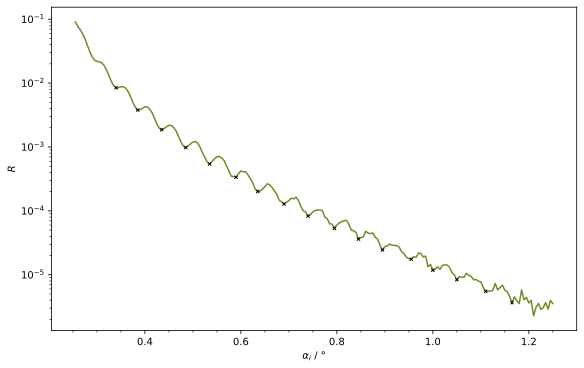

lam = 1.5406e-10 m
ang_diff = 0.052+/-0.005 °
d_kiessig = (8.6+/-0.8)e-08 m


In [8]:
R_corr = I_corr / I_c.n

ind = peaks(-R_corr[50:235], distance=9)[0]

plt.plot(ang_corr[50:250], R_corr[50:250], color='olivedrab')
plt.plot((ang_corr[50:235])[ind], (R_corr[50:235])[ind], 'kx', ms=3.21)

plt.xlabel(r'$\alpha_i$ / °')
plt.ylabel(r'$R$')

plt.yscale('log')

plt.show()
plt.close()

p = (ang_corr[50:235])[ind]
p_diff = p[1:] - p[:-1]

ang_diff = u(np.mean(p_diff), np.std(p_diff)) * np.pi / 180

d_kiessig = lam / (2 * ang_diff)

print(f'lam = {lam} m')
print(f'ang_diff = {ang_diff * 180 / np.pi} °')
print(f'd_kiessig = {d_kiessig} m')

### Parratt Algorithm & Fresnel

$$
\begin{align*}
    x_j = \frac{r_j}{t_j} &= e^{-2ik_{j, z} d_j}\frac{r_{j, j + 1} + x_{j + 1} e^{2ik_{j + 1, z} d_j}}
    {1 + r_{j, j + 1} x_{j + 1} e^{2ik_{j + 1, z} d_j}} \\\\
    r_{j, j + 1} &= e^{-2k_{j, z}k_{j + 1, z} \sigma_{j, j+1}^2} \frac{k_{j, z} - k_{j + 1, z}}{k_{j, z} + k_{j + 1, z}} \\\\
    k_{j, z} &= \frac{2\pi}{\lambda} \sqrt{\alpha_i^2 - 2\delta_j + 2i\beta_j} \\\\\\\\
    r &= \frac{\alpha_i - \sqrt{\alpha_i^2 - 2\delta + 2i\beta}}{\alpha_i + \sqrt{\alpha_i^2 - 2\delta + 2i\beta}}
\end{align*}
$$

[7.6e-06+/-2.3383163621461987e-06 0.0+/-1.4199571851610478e-06]
[9.1e-07, 7.7e-06, 6.5e-09, 3.7e-07, 8.1e-10, 7.2e-10, 8.6e-08]


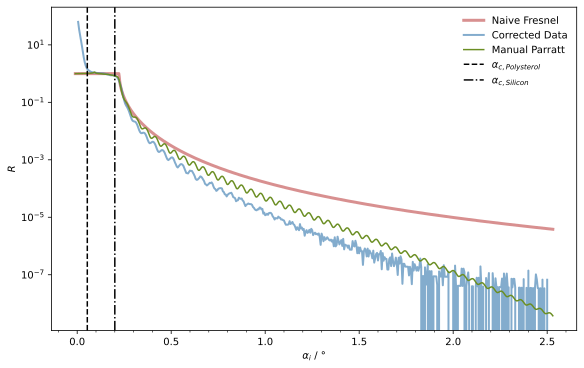

Critical Angles
Polysterol: 0.0772962 °
Silicon: 0.224845 °

Electron Densities
Polysterol: rho_e * r_e = 2.40903e+10 cm^-2
Silicon: rho_e * r_e = 2.03841e+11 cm^-2

Roughness Measures
Polysterol-Air: 8.1e-10 m
Silicon-Polysterol: 7.2e-10 m

Layer Thickness
d_parratt = 8.6e-08 m


In [9]:
def parratt(a, del1, del2, b1, b2, s01, s12, d1):
    a = a * np.pi / 180
    e = np.e
    d0 = 0.0
    k2 = 2 * np.pi * np.sqrt(a**2 - 2 * del2 + 2 * 1j * b2) / lam
    k1 = 2 * np.pi * np.sqrt(a**2 - 2 * del1 + 2 * 1j * b1) / lam
    k0 = 2 * np.pi * a / lam
    r12 = e**(-2 * k1 * k2 * s12**2) * (k1 - k2) / (k1 + k2)
    r01 = e**(-2 * k0 * k1 * s01**2) * (k0 - k1) / (k0 + k1)
    x2 = 0.0
    x1 = e**(-2 * 1j * k1 * d1) * r12
    x0 = e**(-2 * 1j * k0 * d0) * (r01 + x1 * e**(2 * 1j * k1 * d0)) / (1 + r01 * x1 * e**(2 * 1j * k1 * d0))
    return np.abs(x0)**2

def fresnel(a, del0, b0):
    a = a * np.pi / 180
    r = (a - np.sqrt(a**2 - 2 * del0 + 2 * 1j * b0)) / (a + np.sqrt(a**2 - 2 * del0 + 2 * 1j * b0))
    return np.abs(r)**2

par, cov = fit(fresnel, ang_corr, R_corr, p0=[7.6e-6, 0.0])
err = np.sqrt(np.diag(cov))

par = uar(par, err)

print(par)

x = np.linspace(-0.01, 2.53, 1000)

params = [9.1e-7, 7.7e-6, 6.5e-9, 3.7e-7, 8.1e-10, 7.2e-10, 8.6e-8]
print(params)

plt.plot(x, fresnel(x, *noms(par)), color='firebrick', linewidth=3, alpha=1/2, label='Naive Fresnel')
plt.plot(ang_corr, R_corr, color='steelblue', linewidth=2, alpha=2/3, label='Corrected Data')
plt.plot(x, parratt(x, *params), color='olivedrab', label='Manual Parratt')

plt.axvline(np.sqrt(2 * 4.4e-7) * 180 / np.pi, linestyle='--', color='k', label=r'$\alpha_{c, Polysterol}$')
plt.axvline(np.sqrt(2 * 6.1e-6) * 180 / np.pi, linestyle='-.', color='k', label=r'$\alpha_{c, Silicon}$')

plt.xlabel(r'$\alpha_i$ / °')
plt.ylabel(r'$R$')

plt.yscale('log')

plt.legend()

plt.show()
plt.close()

print('Critical Angles')
print(f'Polysterol: {np.sqrt(2 * params[0]) * 180 / np.pi:.6} °')
print(f'Silicon: {np.sqrt(2 * params[1]) * 180 / np.pi:.6} °')
print('\nElectron Densities')
print(f'Polysterol: rho_e * r_e = {params[0] * 2 * np.pi / lam**2 / 10000:.6} cm^-2')
print(f'Silicon: rho_e * r_e = {params[1] * 2 * np.pi / lam**2 / 10000:.6} cm^-2')
print('\nRoughness Measures')
print(f'Polysterol-Air: {params[4]} m')
print(f'Silicon-Polysterol: {params[5]} m')
print('\nLayer Thickness')
print(f'd_parratt = {params[6]} m')